In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re


In [2]:
url =  'https://github.com/afefeb/testgit/blob/master/dataset_penyisihan_bdc_2024.csv?raw=true'

In [3]:
df = pd.read_csv(url, delimiter=';', encoding='utf-8')
df

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [4]:
df['label'].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

In [6]:
df['text'].duplicated().sum()

417

In [7]:
all_duplicated_texts = df[df['text'].duplicated(keep=False)]

print("\nDetailed comparison of duplicated text entries:")
grouped = all_duplicated_texts.groupby('text')
for name, group in grouped:
    print(f"\nText: {name}")
    print(group)


Detailed comparison of duplicated text entries:

Text: @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= @gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0= Iya nih penting suara Batak sebagai populasi etnis ketiga terbesar setelah Jawa Sunda. Mayoritas Batak Kristen cukup anti sama Anies karena diframing radikal sejak
                                                   text      label
1967  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi
3844  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi

Text: Adi menginformasikan bahwa isu utama di kampung mereka adalah sulitnya mendapatkan air bersih dan masalah naiknya air laut. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto
                                                   text             label
1028  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
1311  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
2644  Adi menginformasikan bahwa isu utama di

In [8]:
df_drop_duplicate= df.drop_duplicates(subset='text')

In [9]:
df_drop_duplicate.duplicated().sum()

0

In [10]:
df_drop_duplicate.shape

(4583, 2)

C:\Users\thebl\AppData\Local\Temp\ipykernel_22304\3241434839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)


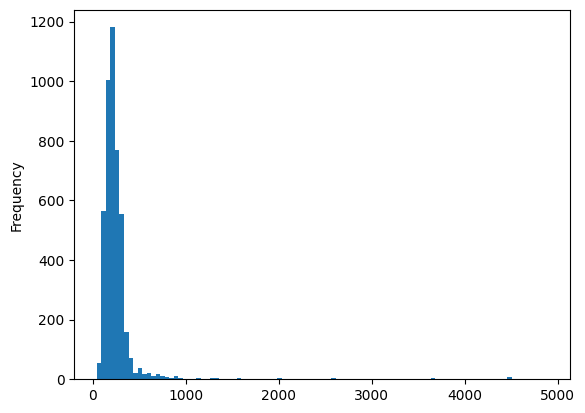

In [11]:
#mencari tau panjang text
df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)

df_drop_duplicate['length'].plot(bins=100, kind='hist') 
plt.show()

In [12]:
df_drop_duplicate.describe()

,length
count,4583.000000
mean,262.575387
std,307.668081
min,45.000000
25%,168.000000
50%,214.000000
75%,275.000000
max,4893.000000


Mencari text paling pendek

In [13]:
df_drop_duplicate[df_drop_duplicate['length'] == 45]['text'].iloc[0]

'pak anies tolong ijinin shopee cina jualan lg'

In [14]:
#Mencari hastags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)
df['hashtags'] = df['text'].apply(extract_hashtags)

hashtag_counts = df.groupby('label')['hashtags'].apply(lambda x: pd.Series(x.sum()).value_counts())

hashtag_table = hashtag_counts.unstack(fill_value=0)

print(hashtag_table)

                         02BangunIndustriKarbon  02KampanyeRamahLingkungan  \
label                                                                        
Demografi                                     0                          0   
Ekonomi                                       0                          0   
Geografi                                      0                          0   
Ideologi                                      0                          0   
Pertahanan dan Keamanan                       0                          0   
Politik                                       1                          0   
Sosial Budaya                                 0                          0   
Sumber Daya Alam                              0                          2   

                         02MakinSulitDisusul  02Melanjutkan  \
label                                                         
Demografi                                  0              2   
Ekonomi                       

Maybe Hastag berguna ???

## Preprocess


In [15]:
import re

def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'\[.*?\]', '', text)  # Hapus [[pattern]]
    text = re.sub(r'@[a-zA-Z0-9+/]+=', '', text)  # Hapus yang tidak jelas (@asdadaidajsda=)
    text = re.sub(r'\brt\b', '', text)  # Hapus rt
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Hapus simbol aneh
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
 
    return text

In [16]:
label = df_drop_duplicate['label']


In [17]:
df_clean = df_drop_duplicate['text'].apply(clean_text)

In [18]:
df_clean_label = pd.concat([df_clean, label], axis=1)

In [24]:
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah denger nih di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden keha

In [20]:
#Buat membandingkan ini raw text
for text, label in zip(df['text'].iloc[0:10], df['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto

Label: Politik
Text: RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2]

Label: Demografi
Text: @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda

In [21]:
df_clean_label.to_csv('cleaned_dataset_without_hash.csv', index=False)

Melihat kata paling bayak dalam datset

In [29]:
from collections import Counter

df_clean_label['temp_list'] = df_clean_label['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_clean_label['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,dan,2620
1,yang,2337
2,di,2002
3,anies,1994
4,ganjar,1957
5,prabowo,1671
6,untuk,1170
7,pak,1091
8,ini,1072
9,pranowo,1020


hapus stop word seperti di , dan , dll

In [23]:
df_clean_label.to_csv('cleaned_dataset.csv', index=False)


Sampe sini kebawah itu percobaan semua :)

In [24]:
import math

def detect_political_keywords(text):
    political_keywords = ["pemilu", "partai politik", "calon presiden", "politik", "pemerintah", "korupsi", "pemilih"]
    max_score = len(political_keywords)  # Skor maksimum berdasarkan jumlah kata kunci politik
    score = sum(1 for keyword in political_keywords if keyword in text.lower())  # Hitung jumlah kata kunci yang ditemukan
    return math.log(1 + score) / math.log(1 + max_score)  # Nilai skala logaritmik dari 0 hingga 1 berdasarkan jumlah kata kunci yang ditemukan

# Tambahkan fitur keyword spotting sebagai skala nilai logaritmik
df['political_keyword_score'] = df['text'].apply(detect_political_keywords)


In [25]:
df[50:100]

,text,label,hashtags,political_keyword_score
50,RT Yang sudah yakin vote Anies-Muhaimin pada 1...,Politik,[NakesDesakAnies],0.000000
51,RT DATA YANG MANAAAAA ???? Data lahan pak prab...,Pertahanan dan Keamanan,[],0.000000
52,"RT Video ini direkam 5 April 2014 dlm acara ""M...",Politik,[AMINAjaDulu],0.000000
53,Pak Ganjar dan Prof Mahfud memperoleh dukungan...,Politik,"[GanjarMahfud2024, DuluJokowiSekarangGanjar, C...",0.333333
54,RT JK Ungkap Sebab Tanah Bob Hasan Bisa Dimili...,Politik,[],0.000000
55,RT Sekarang bawaslu malah terkesan yg membenar...,Politik,[],0.000000
56,RT pak prabowo adalah tipe seseorang yang lebi...,Politik,[KinerjaBukanOmonOmon],0.000000
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya,[AMINAjaDulu],0.000000
58,RT Jawaban pak Anies di Luar Prediksi...Ulama ...,Politik,[],0.000000
59,"Nelayan butuh tindakan nyata, Ganjar Pranowo, ...",Politik,"[NelayanSolusiNyata, JNK, GanjarMahfudRebound,...",0.000000


In [26]:
keyword = "capres"  

filtered_texts = df[df['text'].str.lower().str.contains(keyword)]

label_counts = filtered_texts.groupby('label').apply(lambda x: x['text'].str.lower().str.contains(keyword).sum())

for label, count in label_counts.items():
    print("Label:", label)
    print("Jumlah teks yang mengandung kata kunci 'capres':", count)
    print()

    filtered_texts_label = filtered_texts[filtered_texts['label'] == label]
    for index, row in filtered_texts_label.iterrows():
        print("Text:", row['text'])
        print()

Label: Demografi
Jumlah teks yang mengandung kata kunci 'capres': 2

Text: RT BASIS 3 PASANGAN CAPRES MENURUT DEMOGRAFI Prabowo ÃƒÂ¢Ã‚â‚¬Ã‚â€œ Gibran unggul di sebagian besar segmen demografi warga, terutama generasi muda, etnis Sunda dan Melayu. Kecuali pada kelompok pendidikan tinggi. https://t.co/zFKzU0eQXW [RE indikatorcoid]

Text: RT 4 kelompok rentan versi Pak Anies (difabel, bumil, anakÃƒâ€šÃ‚Â², lansia) kurang 2 kelompok lagi : PETANI dan NELAYAN. Kalo ga percaya CARI REKAMAN DEBAT CAPRES PERTAMA, ada capres lain yg menambahkan 2 kelompok tsb ketika moderator menanyakan aksesbilitas pd pelayanan publik. [RE bangmis]

Label: Ekonomi
Jumlah teks yang mengandung kata kunci 'capres': 112

Text: Pasangan Duet Capres Cawapres Ganjar Pranowo Mahfud MD, motor perubahan. Kredit 35% untuk koprasi dan UMKM, jadi andalan bisnis lokal. Sukses terus, teman-teman.JN18A #JNK #GanjarMahfudRebound #GanjarPranowoPilihanUmat

Text: RT Capres nomor urut 1 Anies Baswedan menjelaskan mengenai pergese

C:\Users\thebl\AppData\Local\Temp\ipykernel_27472\3960484762.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  label_counts = filtered_texts.groupby('label').apply(lambda x: x['text'].str.lower().str.contains(keyword).sum())


In [27]:
keyword = "capres"  

filtered_texts = df[df['text'].str.lower().str.contains(keyword)]

label_counts = filtered_texts['label'].value_counts()

# Tampilkan hasil
for label, count in label_counts.items():
    print("Label:", label)
    print("count: ", count)
    print()

Label: Politik
count:  382

Label: Ekonomi
count:  112

Label: Ideologi
count:  72

Label: Pertahanan dan Keamanan
count:  53

Label: Sosial Budaya
count:  23

Label: Sumber Daya Alam
count:  12

Label: Geografi
count:  2

Label: Demografi
count:  2



In [28]:
import re

keyword = r"\bcapres\b"  

filtered_texts = df[df['text'].str.contains(keyword, flags=re.IGNORECASE, regex=True)]

label_counts = filtered_texts['label'].value_counts()

# Tampilkan hasil
for label, count in label_counts.items():
    print("Label:", label)
    print("Count:", count)
    print()

Label: Politik
Count: 337

Label: Ekonomi
Count: 112

Label: Ideologi
Count: 72

Label: Pertahanan dan Keamanan
Count: 32

Label: Sosial Budaya
Count: 22

Label: Sumber Daya Alam
Count: 12

Label: Geografi
Count: 2

Label: Demografi
Count: 2

